In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler  # for normalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
X,y = make_classification(
    n_samples=600,
    n_features=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    class_sep=1.2,
#     hypercube=True,
#     shift=0.0,
    scale=1.0,
    shuffle=True,
#     random_state=3,
)

y[y==0] = -1

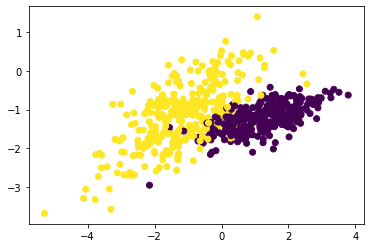

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

# SVM geometric interpretation

<img style="float: left;" src=https://i.imgur.com/a0Fcfr1.png width=500px>

𝜋   : 𝑤^𝑇 𝑥+𝑏=0

𝜋^(+ ): 𝑤^𝑇 𝑥+𝑏=1

𝜋^(− ): 𝑤^𝑇 𝑥+𝑏=−1

# Mathematical derivation

<img style="float: left;" src=https://i.imgur.com/LVz0fXm.png width=500px>

<img style="float: left;" src=https://i.imgur.com/1dOSwPz.png width=500px>

<img style="float: left;" src=https://i.imgur.com/4Tbf96q.png width=500px>

<img style="float: left;" src=https://i.imgur.com/Rc3Sqoo.png width=500px>

# Soft Margin SVM

<img style="float: left;" src=https://i.imgur.com/kF3UKwH.png width=500px>

<img style="float: left;" src=https://i.imgur.com/nRAPsPd.png width=500px>

# Hinge loss

<img style="float: left;" src=https://i.imgur.com/YupYEui.png width=500px>

# Hinge loss behaviour
<img style="float: left;" src=https://i.imgur.com/h4L5No7.png width=500px>

In [ ]:
class SVM:
    def __init__(self, C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
    
    def hingeLoss(self, X, Y, W, bias):
        loss = 0.0
        loss += 0.5*np.dot(W.T,W)[0][0]
        for i in range(X.shape[0]):
            di = Y[i]*(np.dot(X[i].reshape(1,-1),W)+bias)
            di = di[0]
            loss += self.C*max(0,(1-di))
        return loss
    
    def sgd(self, c, bias):
        batch_size = 100
        learning_rate = 0.001
        maxepochs = 10 
        total_samples = X.shape[0]
        W = np.zeros((X.shape[1],1))
        losses = []
        
        for i in range(maxepochs):
            
            #Calculating Hinge loss
            loss = self.hingeLoss(X, y, W, bias)
            
            #Appending and creating list of loss
            losses.append(loss)
            
            #Creating Mini batches for batch SGD
            ids = np.arange(X.shape[0])
            np.random.shuffle(ids)
            
            #Going over one whole epoch one batchsize at a time
            for start in range(0, total_samples, batch_size):

                #Calculating gradients w.r.t W and b
                g_w = 0
                g_b = 0
                
                #Summation over Batch Gradient
                for j in range(start, start+batch_size):
                    if j < total_samples:
                        idx = ids[j]
                        di = y[idx]*(np.dot(X[idx].reshape(1,-1),W)+bias)[0]
                        
                        #If class is greater than 1
                        if di > 1:
                            g_w += 0
                            g_b += 0
                            
                        else: #otherwise
                            g_w += c*y[idx]*X[idx].reshape(1,-1).T
                            g_b += c*y[idx]
                    
                #Updating gradient weights after each minibatch
                W = W - learning_rate*W + learning_rate*g_w
                bias = bias + learning_rate*g_b
        return W, bias, losses
    
    def fit(self,X,Y):
        c = self.C
        bias = 0.0
        self.W, self.b, losses = self.sgd(c,bias)
        return self.W, self.b, losses  

In [ ]:
model = SVM(C=10)
Weights , bias, loss_list = model.fit(X,y)

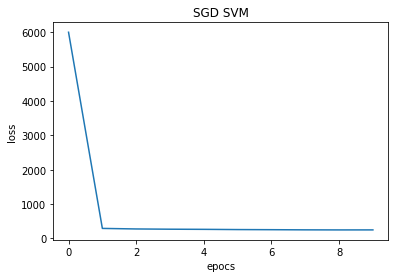

In [ ]:
plt.plot(loss_list)
plt.xlabel('epocs')
plt.ylabel('loss')
plt.title('SGD SVM')
plt.show()

In [ ]:
def plotHyperplane(w1,w2,b):
    plt.figure(figsize=(7,5))
    x_1 = np.linspace(-2,4,10)
    x_2 = -(w1*x_1+b)/w2
    
    positive_plane = -(w1*x_1 + b +1)/w2
    negative_plane = -(w1*x_1+b-1)/w2
    
    plt.plot(x_1,x_2,label="HyperPlane")
    plt.plot(x_1,positive_plane,label="Positive Plane")
    plt.plot(x_1,negative_plane,label="Negative Plane")
    plt.legend()
    plt.scatter(X[:,0],X[:,1],c=y)
    plt.show()

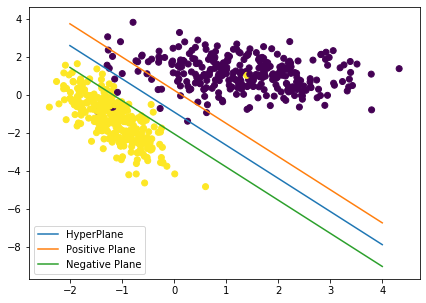

In [ ]:
plotHyperplane(Weights[0,0],Weights[1,0],bias)

<img style="float: left;" src=https://i.imgur.com/ZujpEtD.png width=500px>